In [ ]:
import matplotlib.pyplot as plt

'''
Implementing the closed for matting in pyTorch to utilize GPU.
'''

In [8]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [9]:
def get_laplacian(image, map_const):
    pass

In [32]:
class ClosedFormMatting():
    def __init__(self):
        pass
    def matting_with_scribbles(self, image, scribbles,  map_const, confidence = 100.0, device='cuda'):
        '''
        image is h x w x 3,
        scribbles : h x w x 3 - our mask coming from borders
        confidence: lambda ?
        map_const: Values which are not expected to change. Basically, our borders.
        '''
        image = torch.tensor(image, device=device, requires_grad=False)
        map_const = torch.tensor(map_const, device=device, requires_grad=False)
        scribbles = torch.tensor(scribbles, device=device, requires_grad=False)
        
        # Prior is 0.5 where everything matches. 1 where scribbling was white, and 0 where scribble was black.
        # const_map is where scribble was done
        
        # I believe we get prior beforehand here. Need to check.
        prior = scribbles
        output = self.matting_with_prior(image, prior, confidence, map_const)
        return output
    
    def matting_with_prior(self, image, prior, lamb, map_const):
        '''
        prior: becomes h x w 
        '''
        # Why it is constant inverse?
        laplacian = get_laplacian(image, map_const)
        # print('got')
        print(float(map_const.numel() **2))
        capital_D_lamb = torch.diag(lamb * map_const.reshape(-1))
        
        solved = torch.linalg.solve(laplacian + capital_D_lamb, (prior * lamb * map_const).reshape(-1) )
        # Not sure what is going here
        alpha = torch.min(torch.max(solved.reshape(prior.shape), dim=0), dim=1)
        return alpha    
    
    
    

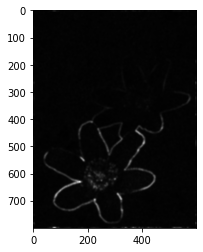

In [33]:
contrast_image = cv2.imread('../SpectrumContrast/SparseContrast.png',0)
plt.imshow(contrast_image,cmap='gray')
plt.show()

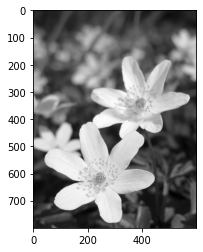

In [34]:
image = cv2.imread('../SpectrumContrast/inputflower.png',0)
plt.imshow(image,cmap='gray')
plt.show()

In [35]:
const_map = np.zeros_like(contrast_image)
const_map[contrast_image != 0] = 1

matting = ClosedFormMatting()
matting.matting_with_scribbles(image=image, scribbles=contrast_image, map_const=const_map)

230400000000.0


OutOfMemoryError: CUDA out of memory. Tried to allocate 858.31 GiB (GPU 0; 3.81 GiB total capacity; 7.33 MiB already allocated; 3.28 GiB free; 26.00 MiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF